<a href="https://colab.research.google.com/github/OswaldVc/AnaDat/blob/main/S3_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

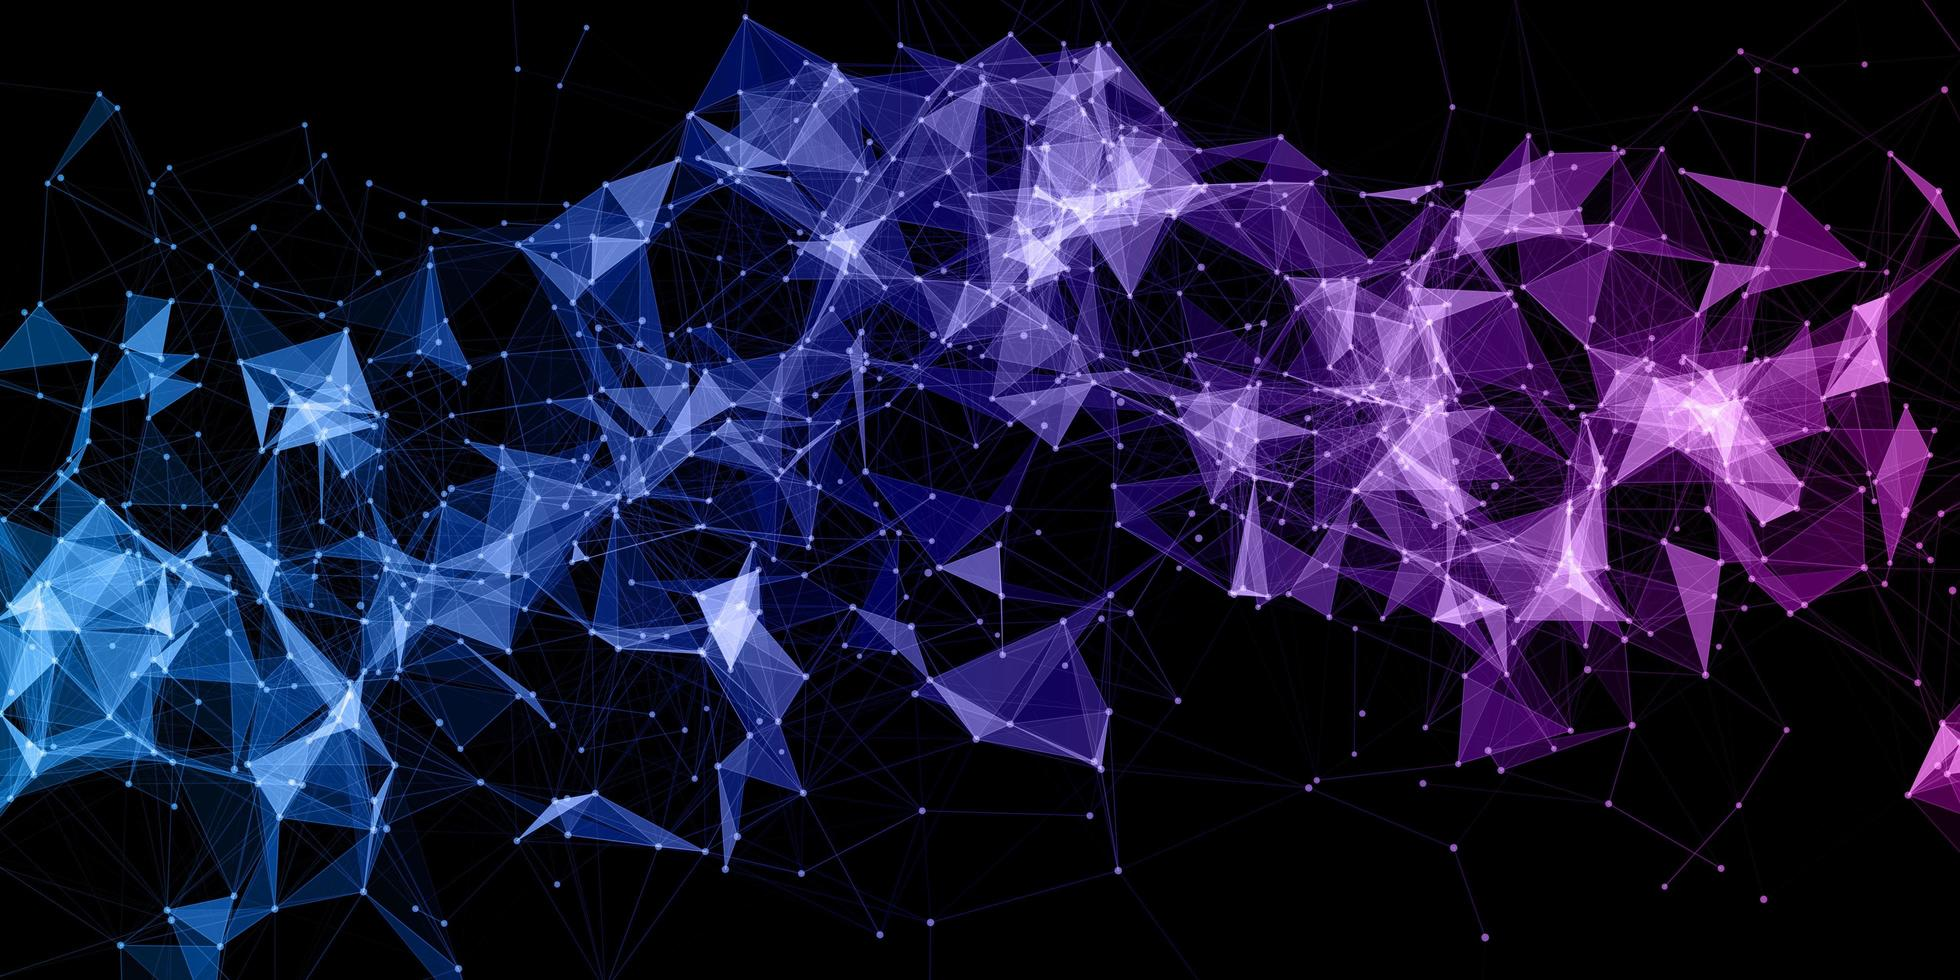


>> By Néstor O. Vásquez C.

**Librerias del proyecto**

In [ ]:
######################################################################################################################################
import pandas as pd  # Biblioteca para operaciones de manipulación de datos.
import numpy as np  # Biblioteca para operaciones numéricas en datos.
import seaborn as sns  # Biblioteca para operaciones de visualización de datos.
import matplotlib.pyplot as plt  # Biblioteca para operaciones de visualización de datos.
import plotly.express as px  # Para visualizaciones interactivas.
import plotly.graph_objects as go  # Para visualizaciones interactivas.
import plotly.io as pio  # Para exportar y visualizar gráficos.
import scipy.stats as st  # Para estadísticas y distribuciones de probabilidad.
from termcolor import colored  # Para imprimir mensajes en color.
######################################################################################################################################
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Para dividir datos y selección de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Para métricas de evaluación de modelos.
from sklearn.metrics import accuracy_score  # Para métricas de evaluación de modelos.
from sklearn.metrics import roc_auc_score, roc_curve  # Para métricas de evaluación de modelos.
from sklearn.metrics import ConfusionMatrixDisplay  # Para visualizar matrices de confusión.
from sklearn.datasets import load_wine  # Para cargar conjuntos de datos.
from sklearn import model_selection  # Para operaciones de modelado.
from sklearn.neighbors import KNeighborsClassifier  # Para clasificación KNN.
from sklearn.ensemble import GradientBoostingClassifier  # Para clasificación con Gradient Boosting.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  # Para codificación.
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler  # Para estandarización.
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, log_loss
from lightgbm import LGBMClassifier  # Para clasificación con LGBM.
######################################################################################################################################
from IPython.display import Image  # Para mostrar imágenes.
from sklearn.preprocessing import StandardScaler  # Para escalar datos.
from sklearn.decomposition import PCA  # Para reducción de dimensionalidad.
from sklearn.cluster import KMeans  # Para clustering.
from matplotlib.colors import ListedColormap  # Para mapas de colores.
from tabulate import tabulate
######################################################################################################################################
# Ignorar advertencias.
import warnings
warnings.filterwarnings("ignore")
######################################################################################################################################
# Configurar opciones de impresión.
from sklearn import set_config
set_config(print_changed_only=False)
######################################################################################################################################
# Mensaje de éxito.
print(colored("\n LAS LIBRERÍAS REQUERIDAS SE IMPORTARON CON ÉXITO...", "green"))


 LAS LIBRERÍAS REQUERIDAS SE IMPORTARON CON ÉXITO...


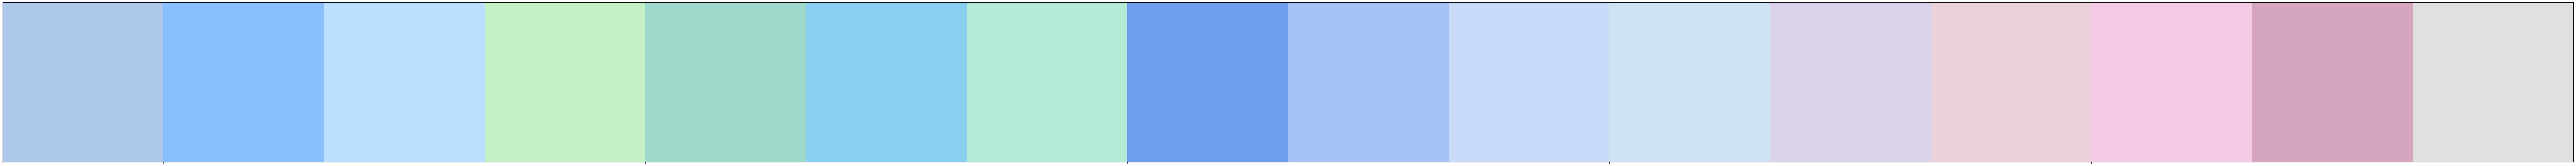

In [ ]:
# Definición de una paleta de azules y colores complementarios en tonos pasteles
custom_colors = [
    '#ACC7E8',  # 1. Azul claro
    '#87BFFF',  # 2. Azul cielo
    '#BBDFFF',  # 3. Azul pastel
    '#C4F0C5',  # 4. Verde agua pastel
    '#9ED9CC',  # 5. Turquesa claro
    '#89CFF0',  # 6. Azul bebé
    '#B5EAD7',  # 7. Menta claro
    '#6D9EEB',  # 8. Azul cornflower
    '#A4C2F4',  # 9. Azul periwinkle
    '#C9DAF8',  # 10.Azul polvo
    '#CFE2F3',  # 11. Azul hielo
    '#D9D2E9',  # 12. Lila pastel
    '#EAD1DC',  # 13. Rosa pastel
    '#F4CAE4',  # 14. Malva claro
    '#D5A6BD',  # 15. Rosa viejo
    '#E0E0E0'   # 16. Gris claro
]

sns.palplot(custom_colors, size=8)

# **CARGAR EL CONJUNTO DE DATOS**

<P align="justify">
El conjunto de datos utilizado, es el conjunto de datos de reconocimiento de vinos disponible en UCI. Este conjunto de datos tiene características continuas que son heterogéneas en escala debido a diferencias propiedades que miden (por ejemplo, contenido de alcohol y ácido málico).
<P/>

In [ ]:
# Cargar el conjunto de datos
X, y = load_wine(return_X_y=True, as_frame=True)

## **EXPLORANDO LOS DATOS**





In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
# El método isnull().sum() aplicado a un DataFrame de Pandas se utiliza para
# detectar la presencia de valores nulos o faltantes en cada columna del DataFrame.
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

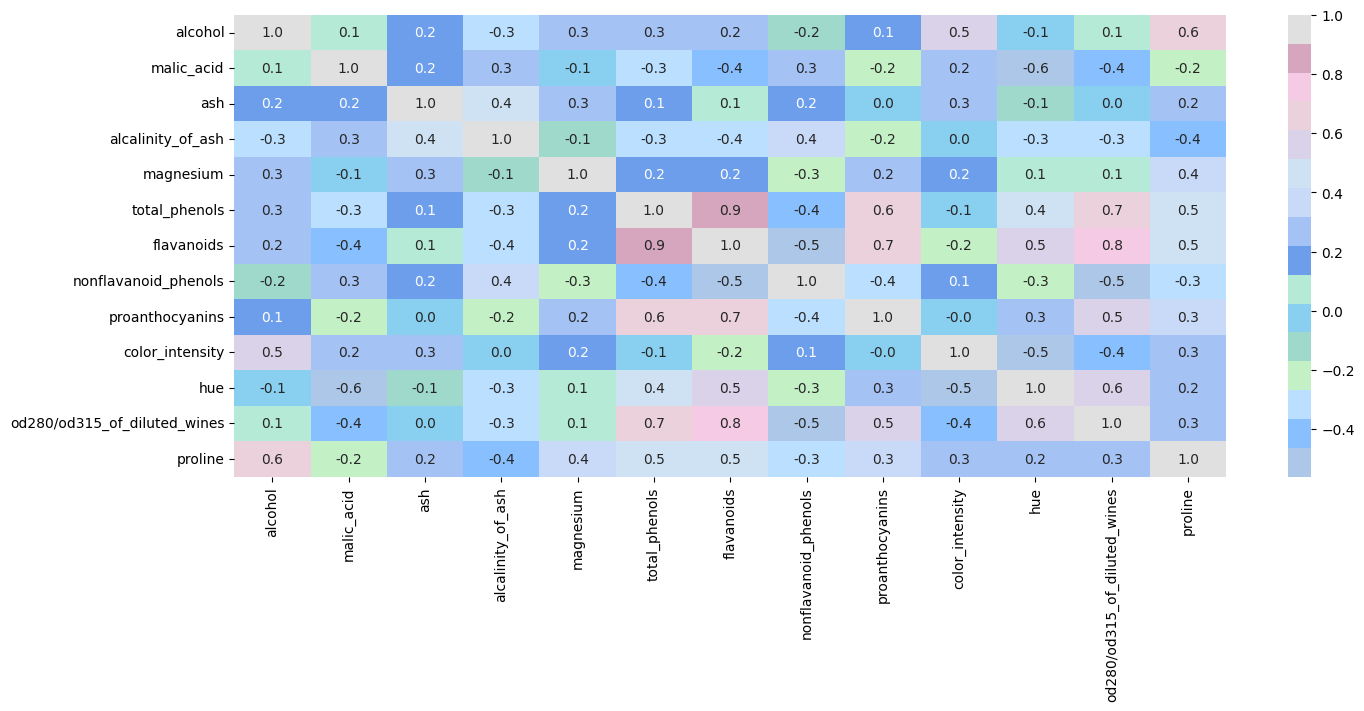

In [ ]:
# Generar un mapa de calor de la matriz de correlación del DataFrame df
# Utilizar una paleta de colores personalizada definida por la lista custom_colors
# Convertir la lista de colores a un ListedColormap para su uso en el mapa de calor
# Mostrar los valores de correlación como anotaciones en el mapa de calor, con un formato de un solo decimal
# Mostrar el gráfico utilizando plt.show()

# Crea un mapa de color personalizado y se ajusta el tamaño de la ventana.
plt.figure(figsize = (16,6))
cmap_custom = ListedColormap(custom_colors)

# Crea el mapa de calor utilizando tu mapa de color personalizado
sns.heatmap(X.corr(), annot=True, cmap=cmap_custom, fmt='.1f')
plt.show()

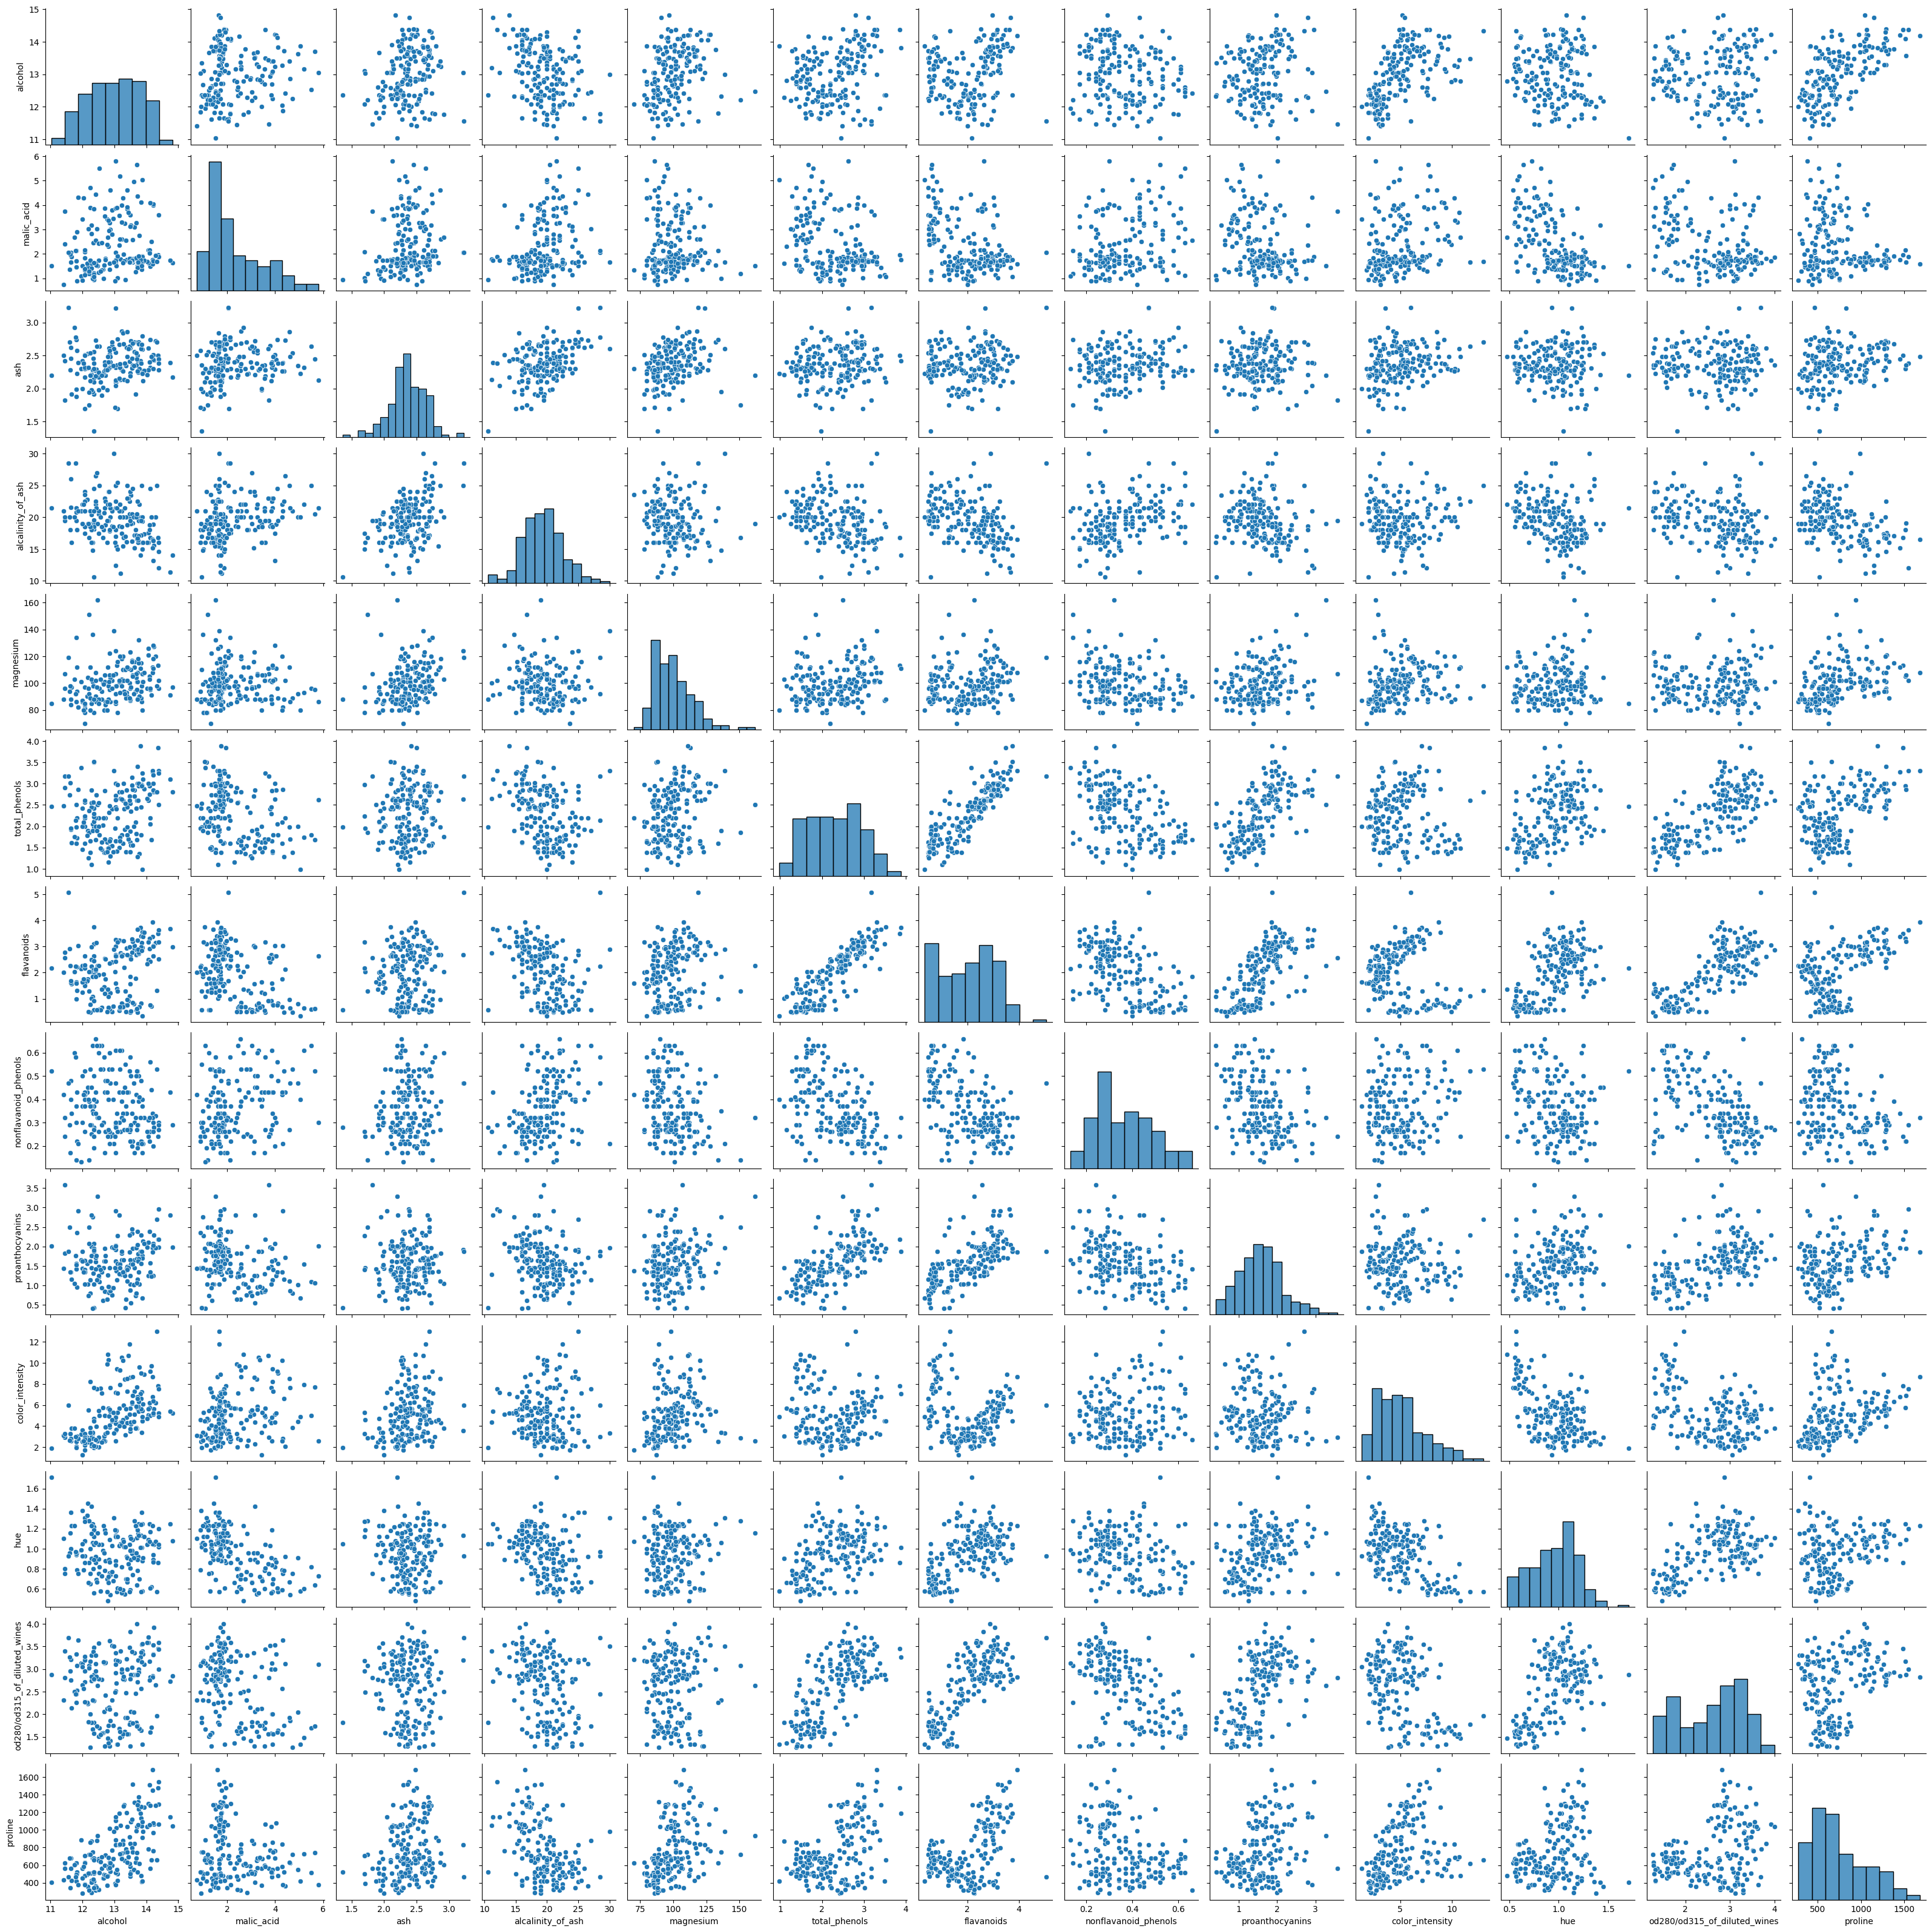

In [ ]:
# Crea el gráfico pairplot con tu paleta de colores personalizada
sns.pairplot(X, palette=custom_colors)
plt.show()

# **PREPARANDO EL CONJUNTO DE DATOS**


In [ ]:
# Se crea una instancia de StandardScaler y se especifica que la salida debe ser un DataFrame de pandas
scaler = StandardScaler().set_output(transform="pandas")

# Se dividen los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
# X_train y X_test contienen las características, y_train y y_test contienen las etiquetas
# Se reserva el 30% de los datos como conjunto de prueba (test_size=0.30) y se utiliza una semilla aleatoria para reproducibilidad (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Se ajusta el escalador a los datos de entrenamiento y se transforman las características de entrenamiento
# El resultado, scaled_X_train, contiene las características de entrenamiento estandarizadas
scaled_X_train = scaler.fit_transform(X_train)

# **MODELO KNN**

>> Reescalamos en modelos KNN



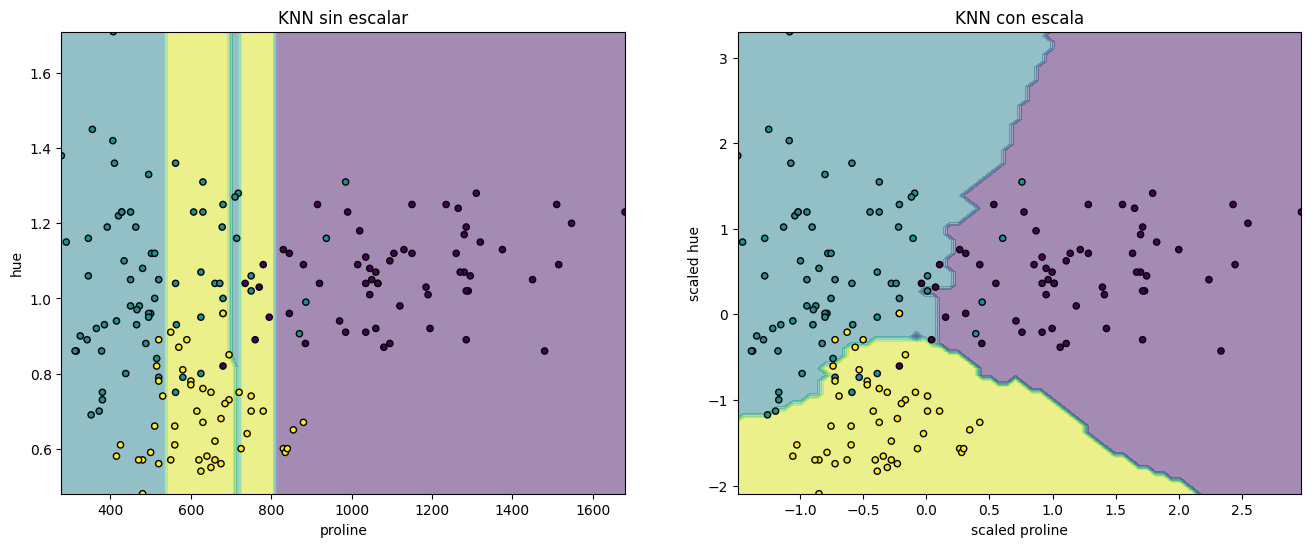

In [ ]:
# Se seleccionan las características 'proline' y 'hue' del DataFrame X y se asignan a X_plot
X_plot = X[["proline", "hue"]]

# Se escalan las características en X_plot y se asignan a X_plot_scaled utilizando el objeto scaler previamente creado
X_plot_scaled = scaler.fit_transform(X_plot)

# Se crea un clasificador KNeighborsClassifier con 20 vecinos
clf = KNeighborsClassifier(n_neighbors=20)

# Se define una función fit_and_plot_model para ajustar el modelo y visualizar los límites de decisión
def fit_and_plot_model(X_plot, y, clf, ax):
    # Se ajusta el clasificador a las características X_plot y las etiquetas y
    clf.fit(X_plot, y)

    # Se utiliza DecisionBoundaryDisplay para mostrar los límites de decisión del modelo
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )

    # Se agregan los puntos de datos al gráfico de dispersión
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")

    # Se establecen los límites del eje x e y basados en las características
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))

    # Se devuelve el objeto Axes actualizado
    return disp.ax_

# Se crea una figura con dos subtramas, ax1 y ax2
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Se llama a la función fit_and_plot_model para visualizar el modelo sin escalar en la subtrama ax1
fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN sin escalar")  # Se establece el título de la subtrama ax1

# Se llama a la función fit_and_plot_model para visualizar el modelo escalado en la subtrama ax2
fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")  # Se establece la etiqueta del eje x de la subtrama ax2
ax2.set_ylabel("scaled hue")  # Se establece la etiqueta del eje y de la subtrama ax2
_ = ax2.set_title("KNN con escala")  # Se establece el título de la subtrama ax2

# **Reducción dimensional de PCA**

<P align="justify">
El uso de reducción dimensional PCA consiste en encontrar las características que maximizan la varianza. Si una característica varía más que las demás sólo debido a sus respectivas escalas, PCA se determinaría que dicha característica domina la dirección de los componentes principales.
<p/>

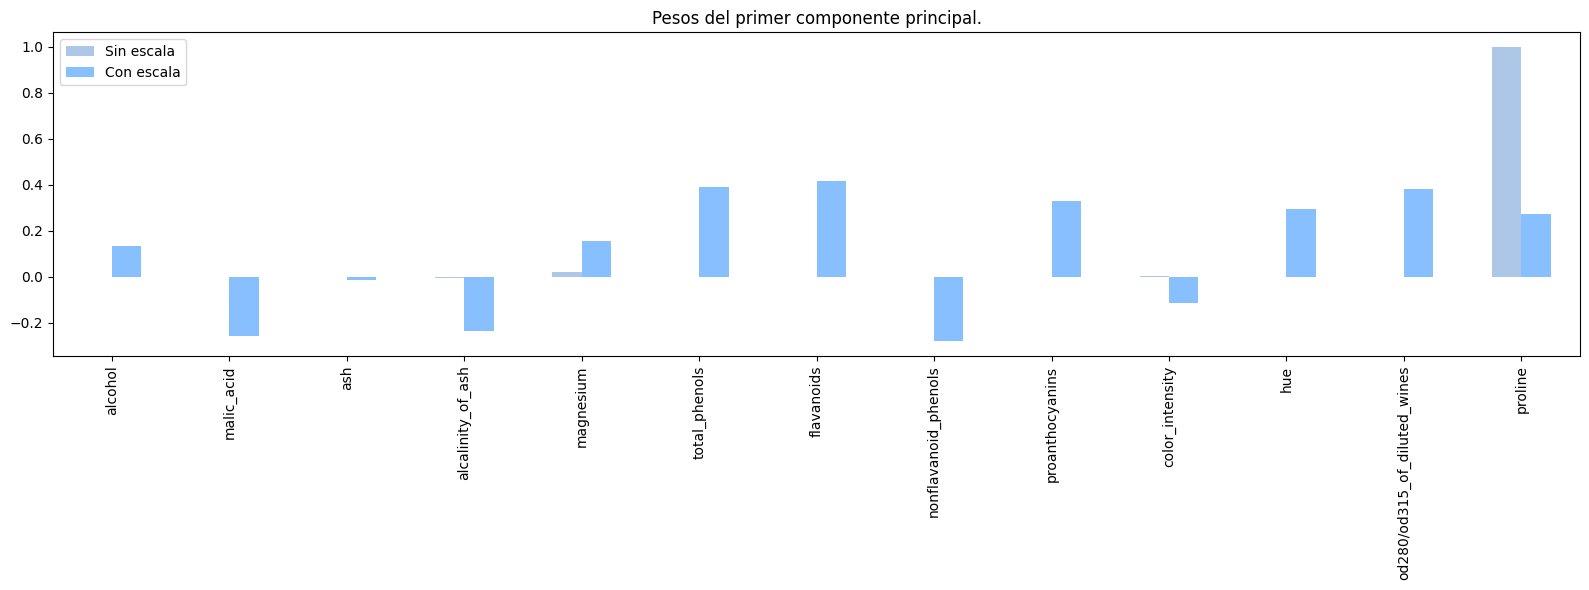

In [ ]:
pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["Sin escala"]
)
first_pca_component["Con escala"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Pesos del primer componente principal.", figsize=(16, 6), color = custom_colors,
)

_ = plt.tight_layout()

<P align="justify">
La característica "prolina" domina la dirección del primer componente principal sin escala, estando aproximadamente dos órdenes de magnitud por encima de las otras características. Esto contrasta cuando se observa el primer componente principal de la versión escalada de los datos, donde los órdenes de magnitud son aproximadamente los mismos en todas las características.
<P/>

Podemos visualizar la distribución de los componentes principales en ambos casos:

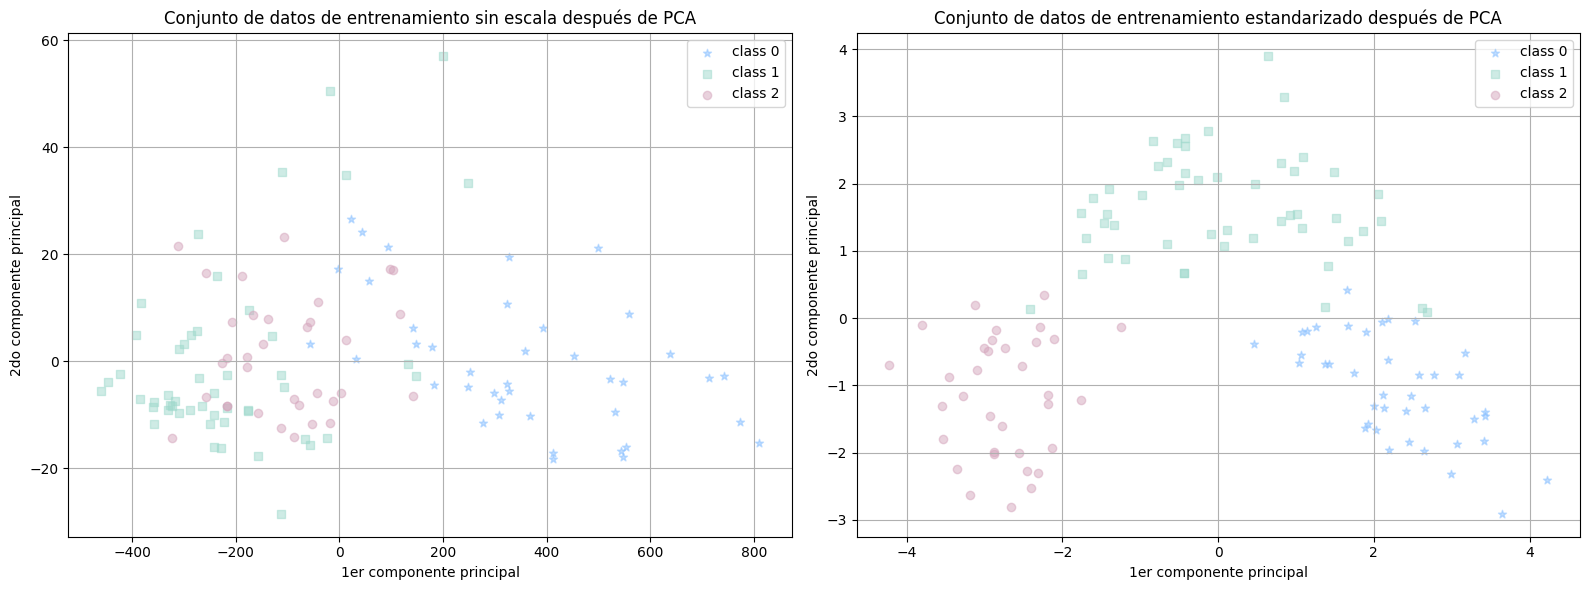

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

target_classes = range(0, 3)
colors = ("#87BFFF", "#9ED9CC", "#D5A6BD")
markers = ("*", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Conjunto de datos de entrenamiento sin escala después de PCA")
ax2.set_title("Conjunto de datos de entrenamiento estandarizado después de PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1er componente principal")
    ax.set_ylabel("2do componente principal")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

En el gráfico anterior podemos apreciar que escalar las características antes de reducir la dimensionalidad da como resultado componentes con el mismo orden de magnitud. En este caso también mejora la separabilidad de las clases.

## **Ventajas del cambio de escala en el rendimiento del modelo.**

In [ ]:
Cs = np.logspace(-5, 5, 20)

sin_escalar_clf = make_pipeline(pca, LogisticRegressionCV(Cs=Cs))
sin_escalar_clf .fit(X_train, y_train)

escalado_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=Cs))
escalado_clf.fit(X_train, y_train)

print(f"PCA sin escala: {sin_escalar_clf [-1].C_[0]:.4f}\n")
print(f"Estandarizados con PCA: {escalado_clf[-1].C_[0]:.2f}")

PCA sin escala: 0.0004

Estandarizados con PCA: 20.69


Ahora evaluamos el efecto del escalado sobre la precisión y la pérdida logarítmica media de los modelos óptimos:

In [ ]:
y_pred = sin_escalar_clf.predict(X_test)
y_pred_scaled = escalado_clf .predict(X_test)
y_proba = sin_escalar_clf.predict_proba(X_test)
y_proba_scaled = escalado_clf .predict_proba(X_test)

print("Precisión de la prueba para el PCA sin escala")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Precisión de los datos estandarizados con PCA")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")
print("Pérdida de registro para la PCA sin escalar")
print(f"{log_loss(y_test, y_proba):.3}\n")
print("Pérdida de registros para los datos estandarizados con PCA")
print(f"{log_loss(y_test, y_proba_scaled):.3}")

Precisión de la prueba para el PCA sin escala
35.19%

Precisión de los datos estandarizados con PCA
96.30%

Pérdida de registro para la PCA sin escalar
2.07

Pérdida de registros para los datos estandarizados con PCA
0.0824


# **MODELO K-MEANS**

In [ ]:
# Cargar el conjunto de datos
wine = load_wine()
X = wine.data
y = wine.target

# Convertir X en un DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)

# Imprimir las dimensiones del DataFrame y las etiquetas
print("Dimensiones del DataFrame (df): ", df.shape)
print("Etiquetas de (y): ", y.shape)

Dimensiones del DataFrame (df):  (178, 13)
Etiquetas de (y):  (178,)


In [ ]:
## Escalado de funciones con StandardScaler
sc = StandardScaler()
scaled_df = df.copy()
scaled_df = sc.fit_transform(scaled_df)
df.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

# **Aplicación del análisis de componentes principales**

In [ ]:
# Reducción del número de características del conjunto de datos mediante PCA
pca = PCA(2)
pca_data = pca.fit_transform(df)

In [ ]:
fig = px.scatter(
    x=pca_data[:, 0], y=pca_data[:, 1],
    title="Análisis de Componentes Principales (PCA)",
    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2'},
    width=1300, height=600

)

fig.update_traces(marker=dict(size=10, line=dict(width=2,
                                                  color='#9ED9CC')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
# Calcular los valores WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)  # Asumiendo que 'df' es tu DataFrame de datos
    wcss.append(kmeans.inertia_)  # kmeans.inertia_ devuelve los valores WCSS

# Crear un DataFrame con los datos de WCSS
wcss_dataframe = pd.DataFrame({"clusters": range(1, 11), "wcss value": wcss})

# Crear el gráfico interactivo con Plotly Express
fig = px.line(wcss_dataframe, x="clusters", y="wcss value",
              title="Método del codo para agrupaciones óptimas",
              labels={"clusters": "Número de grupos", "wcss value": "Valores WCSS"},
              markers=True, line_shape="spline", color_discrete_sequence=["#BBDFFF"])

# Añadir línea vertical para el punto de codo potencial
fig.add_vline(x=4, line_dash="dash", line_color="red",
              annotation_text="Punto de codo potencial", annotation_position="top left")

# Mostrar la figura
fig.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = pd.Series(kmeans.fit_predict(df))
y_kmeans.head(10)


0    1
1    1
2    1
3    1
4    2
5    1
6    1
7    1
8    1
9    1
dtype: int32

In [ ]:
y_kmeans.value_counts()

0    69
2    62
1    47
Name: count, dtype: int64

In [ ]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

In [ ]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = y_kmeans
pca_dataframe.sample(10)

PCA 1      PCA 2  Cluster
10   763.079712  -8.334317        1
120 -121.945241  -1.588894        2
45   333.254806   5.319331        1
128 -405.061288  -4.451074        0
111 -422.042874  -4.244922        0
98   -87.080293 -10.226573        2
14   800.053394 -12.118447        1
31   768.092939  -7.379897        1
81   -33.131339 -13.187105        2
49   513.187748  -0.863759        1

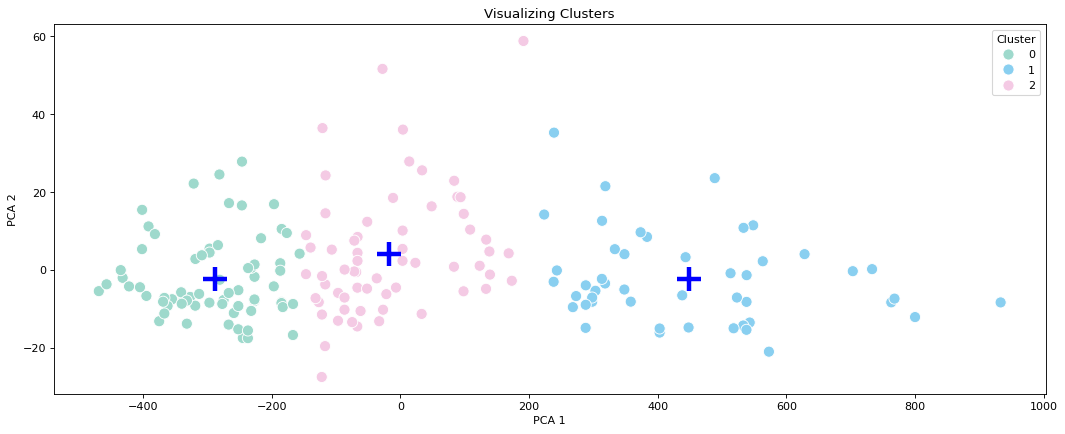

In [ ]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, palette=['#9ED9CC','#89CFF0','#F4CAE4'], s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

In [ ]:
df["Cluster"] = y_kmeans
df.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Cluster  
0                          3.92   1065.0        1  
1                          3.40   1050.0        1  
2                          3.17   1185.0        1  
3                          3.45   1480.0        1  
4                          2.93    735.0        2

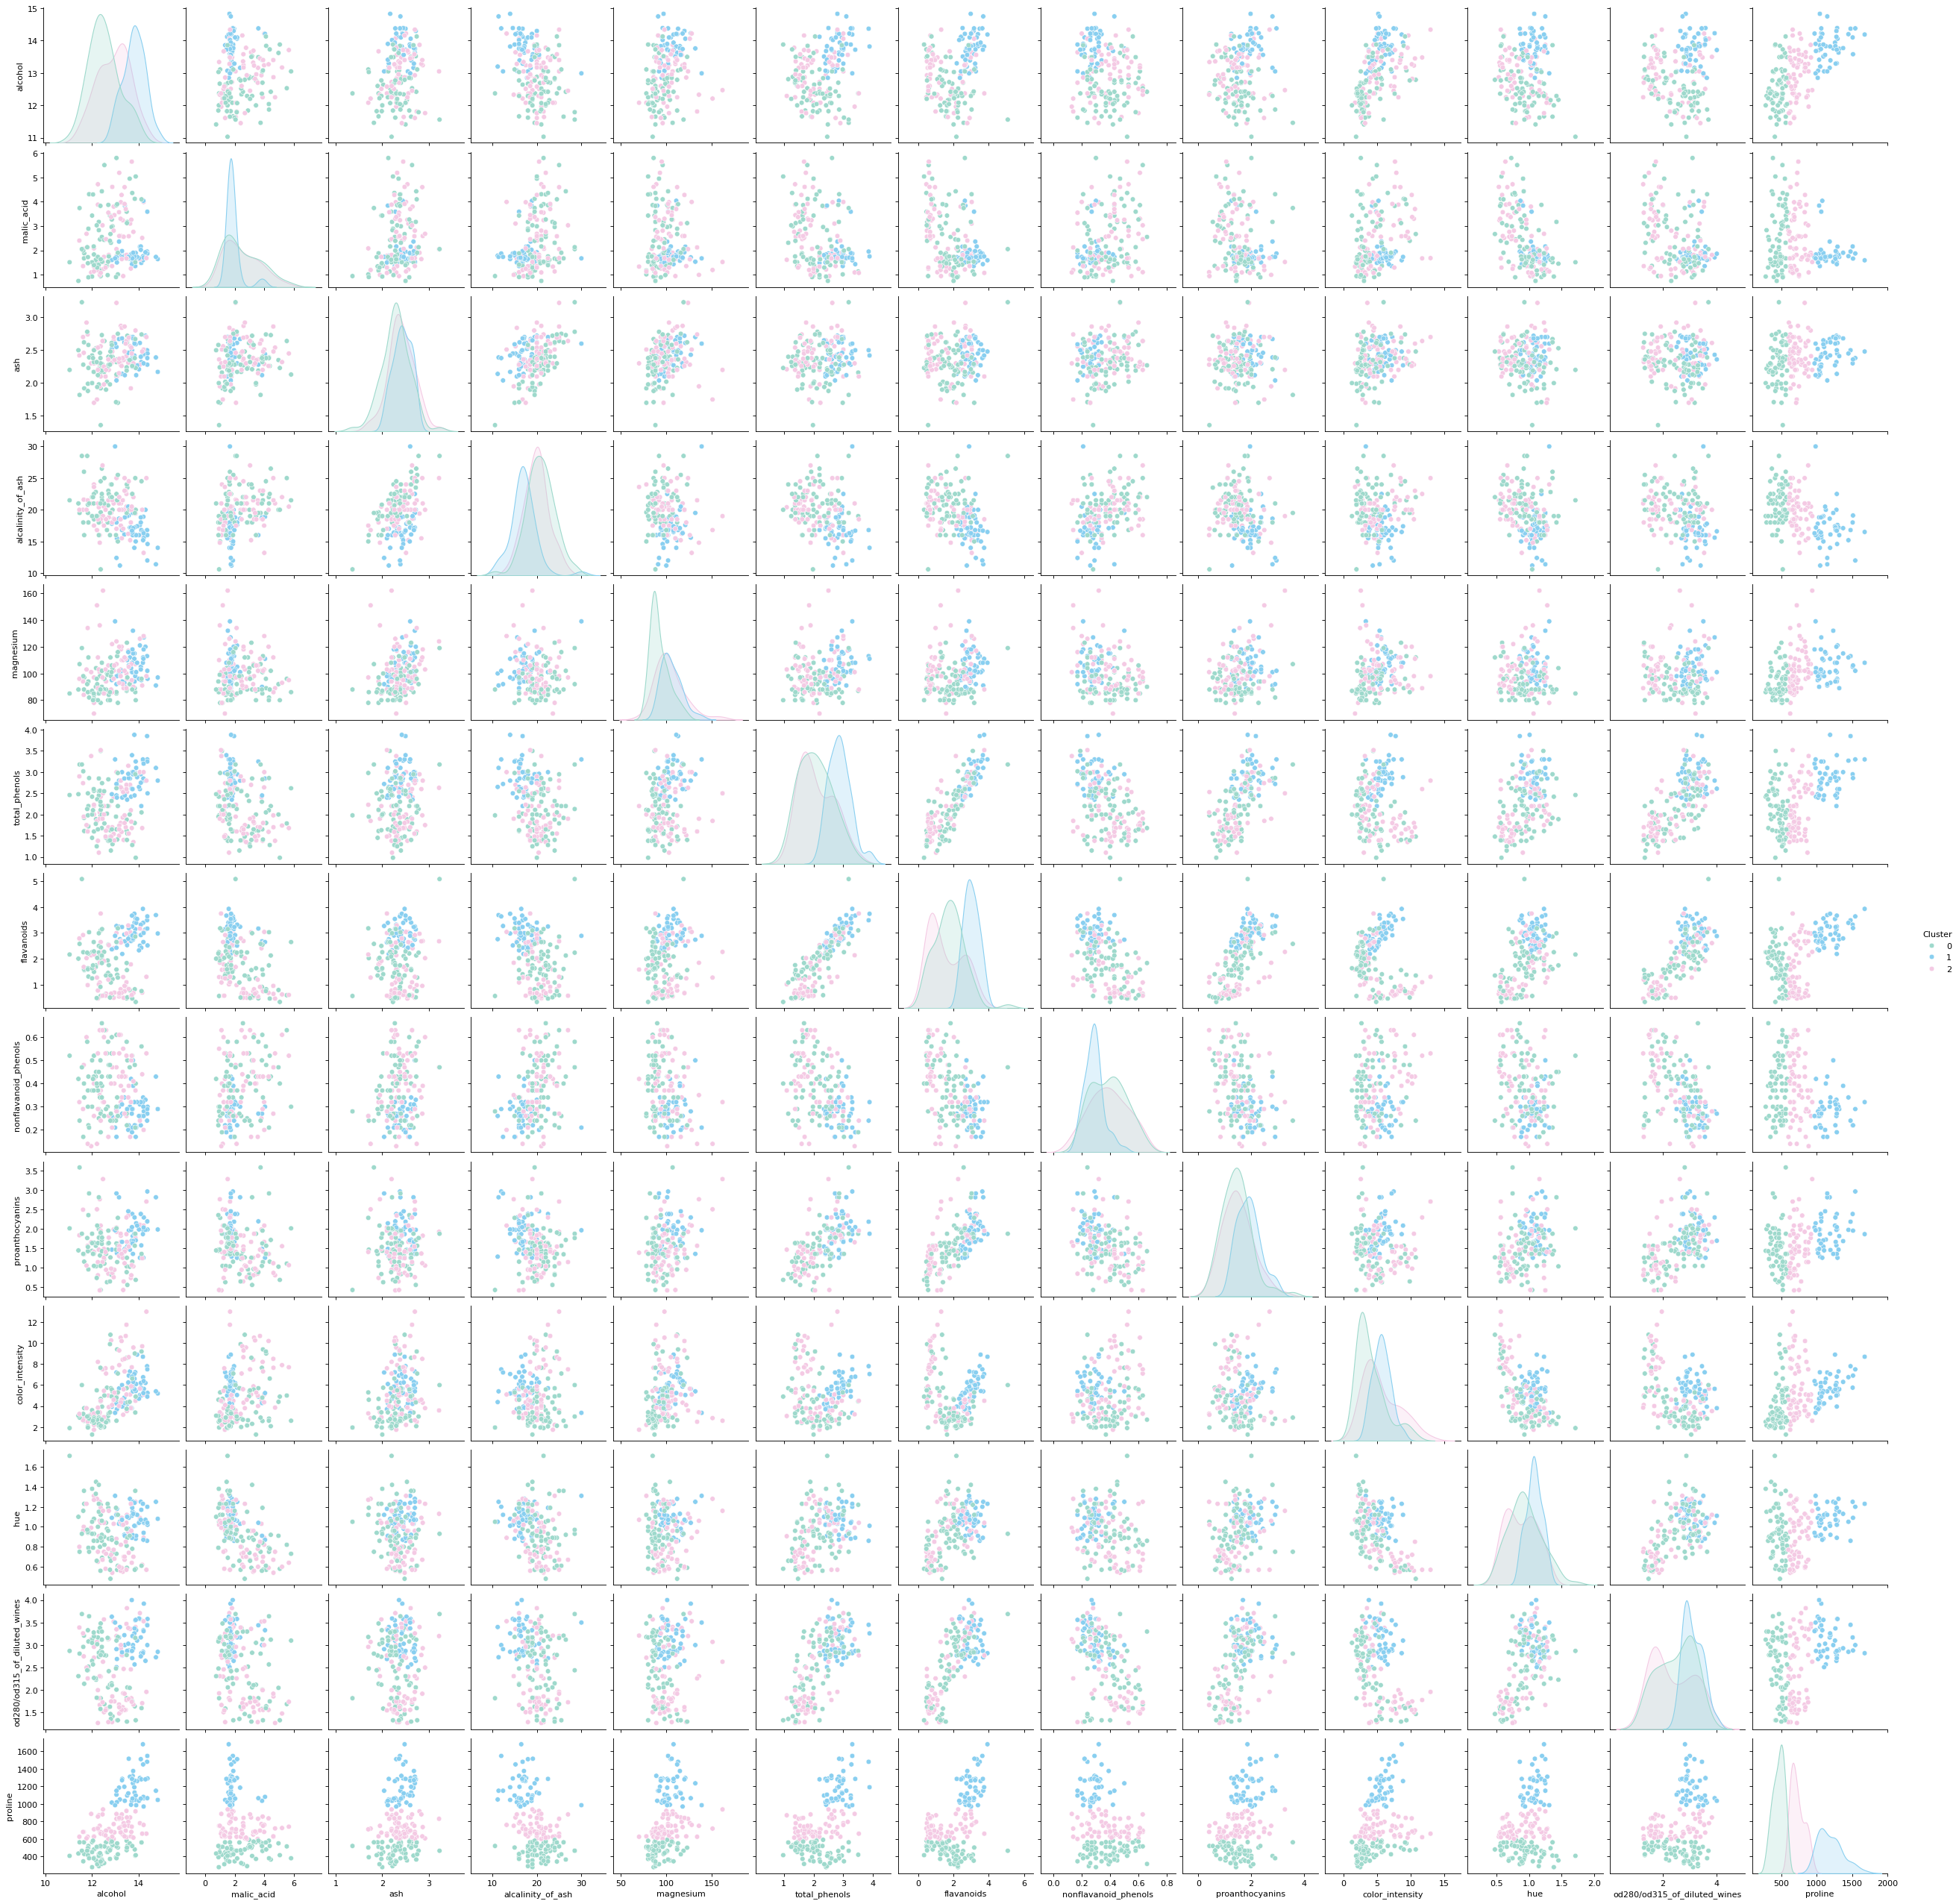

In [ ]:
sns.pairplot(df, hue="Cluster", palette=['#9ED9CC','#89CFF0','#F4CAE4'])
plt.show()

# **Beneficios y desventajas de las técnicas de reducción de dimensionalidad**

Algunos de los principales beneficios que genera aplicar la técnica de reducción de dimensionalidad son los siguientes:

    -Reducir las dimensiones de las características implica una reducción del espacio requerido para almacenar el conjunto de datos, porque este también se reduce.
    -El tiempo de entrenamiento de modelos es menor para dimensiones reducidas.
    -Se facilita la visualización de datos más rápidamente gracias a la reducción de características del conjunto de datos.
    -Desaparecen las características redundantes en el ámbito de la multicolinealidad.

La reducción de dimensionalidad también presenta ciertos inconveniente que se mencionan a continuación, aunque las ventajas son mayores:

    -Se pueden perder algunos datos debido a la reducción de la dimensionalidad.
    -En la técnica de reducción de dimensionalidad de PCA, en ocasiones no se conocen los componentes principales que se deben considerar.


# **Conclusiones**

<P align="justify">
- En resumen, tener demasiadas funciones provocará un modelo ineficiente. Sin embargo, la capacidad de reducir características mediante la reducción de dimensionalidad es una herramienta que se puede emplear para crear modelos más optimizados y eficientes.
<P/>

<P align="justify">
- La reducción de dimensionalidad se puede aplicar a diferentes campos como, por ejemplo, los datos de alta dimensión, el reconocimiento de voz, visualización de datos, reducción de ruido o el procesamiento de señales, entre otros. También, se puede utilizar para transformar datos no lineales en una forma linealmente separable.
<P/>

<P align="justify">
- El uso de esta técnica trae consigo importantes beneficios que van desde la reducción del espacio de almacenamiento del conjunto de datos hasta la eliminación de características redundantes, pasando por una optimización del tiempo de entrenamiento de modelos y facilidad en la visualización de los datos. No obstante, es una técnica que requiere conocimiento y un equipo adecuado para realizarse, pues pueden eliminarse más datos de los debidos y generar un modelo erróneo
<P/>